# M06_T01: Regressions
***Exercicis per practicar amb regressions.***
 

## Nivell1 - 


### Exercici 1
***Parteix el conjunt de Housing Data csv en train i test.***

* 1. Title: Boston Housing Data

* 2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

* 3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

* 4. Relevant Information:

   Concerns housing values in suburbs of Boston.

* 5. Number of Instances: 506

* 6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

* 7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

* 8. Missing Attribute Values:  None.


* ***Es el primer exercici amb el update del curs de data Science, per començar agafaré el dataset i fare una comprovacions in,eliminacio dOutliers i aplicaré una normalitzacio abans de passar als  models per entendre una mica millor les dades***

In [135]:
#Importem les llibreries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from sklearn.decomposition import PCA
%matplotlib inline

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

from scipy.stats import shapiro

pd.options.display.max_columns=None
pd.options.display.max_rows=30

*** Com que el fitxer CSV no te les capçaleres dels atributs el hi afegim nosaltres en el read_CSV segons les pecificacions***

In [136]:
columNames=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
HousingDf=pd.read_csv('housing data.csv',sep=',', header=None,encoding='utf8',names=columNames)
HousingCopyDf=HousingDf.copy()

In [137]:
#Observem el tipus de dades
HousingDf.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [138]:
# Veiem la descripció dela atributs, tots ells numerics , no hem de fer transformacions
HousingDf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [139]:
HousingDf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


***Creo unes funcions que ja he utilitzat en exeercicis anteriors que m'ajudadaran a fer una exploracio i nalisis de dades***

In [140]:

#Funció per mostrar diagrama de caixes per totes les columnes numeriques de la nostra mostra original
def mostraBoxPlot(dataSet,numericColumns):  
    numericColsList = list(numericColumns)
    dec, num = math.modf(len(numericColsList)/4)
    if dec == 0: rows = int(num)
    else: rows = int(num+1)
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,rows*4))
    for i, col in zip(range(len(numericColsList)), numericColsList):
        plt.subplot(rows, 5, i+1)
        ax = sns.boxplot(x=col, data=dataSet, orient='h', linewidth=1 , width=.5)
        plt.title(col, y=.85)
        plt.xlabel("")
    plt.show()

In [141]:
def distNormColumnes(dataSet, col):
    # Valores de la media (mu) y desviación típica (sigma) de los datos
    mu, sigma = stats.norm.fit(dataSet[col])
    # Valores teóricos de la normal en el rango observado
    x_hat = np.linspace(min(dataSet[col]), max(dataSet[col]), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)

    # Gráfico
    ig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x_hat, y_hat, linewidth=2, label='normal')
    ax.hist(x=dataSet[col], density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(dataSet[col], np.full_like(dataSet[col], -0.01), '|k', markeredgewidth=1)
    ax.set_title('Distribución {0}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();
    
    return

In [142]:
def elim_outliners(in_df, min,max,columnes):
    for  columna in columnes:
        quantile1= in_df[columna].quantile(min)
        quantile3= in_df[columna].quantile(max)
        iqr = quantile3-quantile1 #Interquartile range
        rang_low  = quantile1-1.5*iqr
        rang_high = quantile3+1.5*iqr
        out_df = in_df.loc[(in_df[columna]> rang_low)&(in_df[columna]< rang_high)]
    return out_df

***Reviso la distribució de les columnes per observar Outliers***

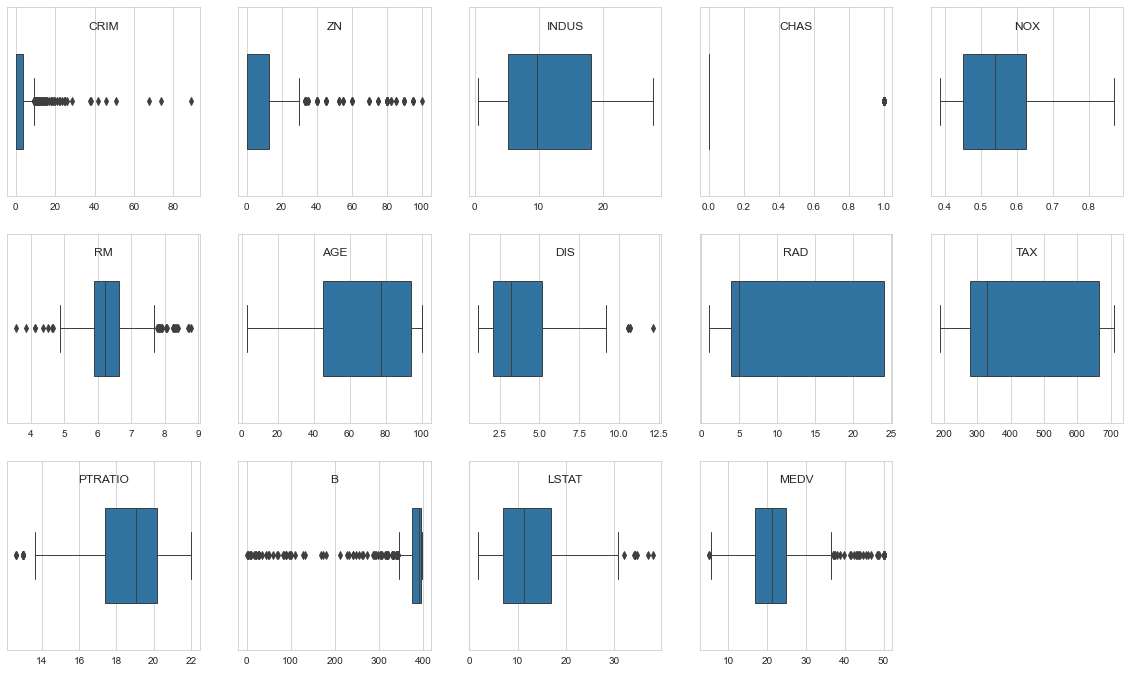

In [143]:
mostraBoxPlot(HousingDf,columNames)


***Fem una primera eliminació de Outliers fen serfir la funció i revisem resultats***

In [144]:
HousingCleanDf = elim_outliners(HousingDf,0.25,0.75,["CRIM","ZN","RM","DIS","B","LSTAT","MEDV"])

In [145]:
HousingCleanDf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


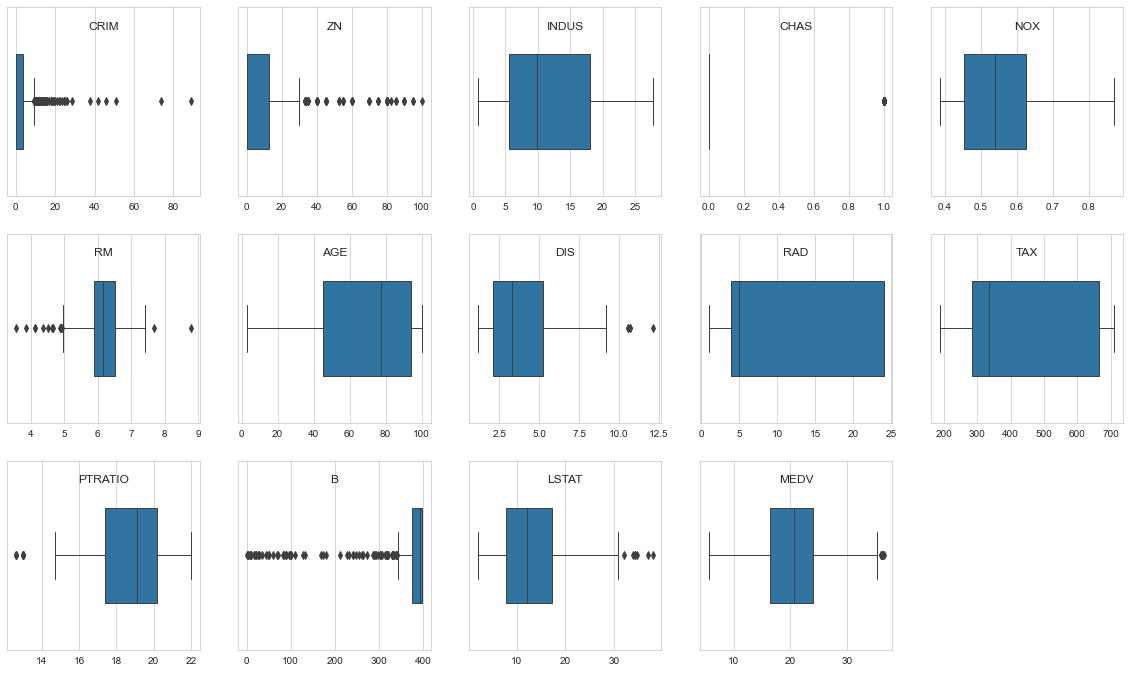

In [146]:
mostraBoxPlot(HousingCleanDf,columNames)

*** Inclus fent una primera tanda d'eliminació d'Outliers encara seguim veiem alguns valors extrems, especialment a CRIM,B;ZM,RM em baixat de 506 a 466 registres, ho deixem aquí ja que no volem disminuir mes el nombre de registres***

***Comprovem si la columna Objetiu segueix una distribució normal***

In [147]:
#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
HousingCleanDf.isna().sum()[HousingCleanDf.isna().sum() != 0]

Series([], dtype: int64)

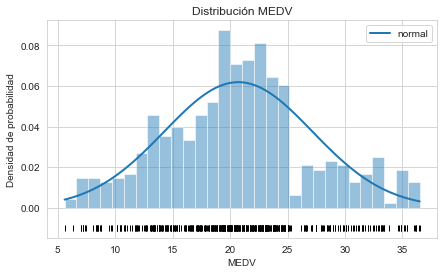

In [148]:
distNormColumnes(HousingCleanDf, "MEDV")

In [149]:
print('Kursotis:', stats.kurtosis(HousingCleanDf['MEDV']))
print('Skewness:', stats.skew(HousingCleanDf['MEDV']))

Kursotis: -0.12988062345264195
Skewness: 0.20191022419581114


* Revisem les distribucions i les correlacions entre columnes

* ***Revisem els valors nuls per cada columna i veiem que no hi han***

In [150]:

#Comprovem nulls, de les variables que en tenen, i observem que la nostra variable objectiu té 8387 NaNs
HousingCleanDf.isna().sum()[HousingCleanDf.isna().sum() != 0]

Series([], dtype: int64)

***Establimt els dos conjunts train/test basat en una proporció de 65/35***

In [152]:

import math
#from scipy.stats import shapiro
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import category_encoders

In [153]:
# split imbalanced dataset into train and test sets without stratification
from sklearn.model_selection import train_test_split


In [154]:
# Establim el set de predictors i els sets de targets

y = HousingCleanDf['MEDV']
X = HousingCleanDf.drop(columns='MEDV')

#Com el nostre conjunt de dades es molt gran podem fer un train del 65% i un test del 35%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=9)


# verifiquem conjunts resultatnts

perTrain = round(100 * len(X_train) / (len(X)))
perTest  = round(100 * len(X_test) / (len(X)))
                 
print("Set de Train: Tamany:  {0}--{1}%".format(len(X_train),perTrain))
print("Set de Test : Tamany:  {0}--{1}%".format(len(X_test),perTest))   


Set de Train: Tamany:  302--65%
Set de Test : Tamany:  164--35%


***Aplico el standar Scaler a totes les mostres train i test***


In [155]:
#finalment apliquem la transformació lineal d'estandarització a totes les dades
standardscaler = preprocessing.StandardScaler()

index = X_test.index
X_testConv = pd.DataFrame(standardscaler.fit_transform(X_test), columns=X_test.columns, index=index)

index = X_train.index
X_trainConv = pd.DataFrame(standardscaler.fit_transform(X_train), columns=X_train.columns, index=index)


index =X.index
X_Total=pd.DataFrame(standardscaler.fit_transform(X), columns=X.columns, index=index)


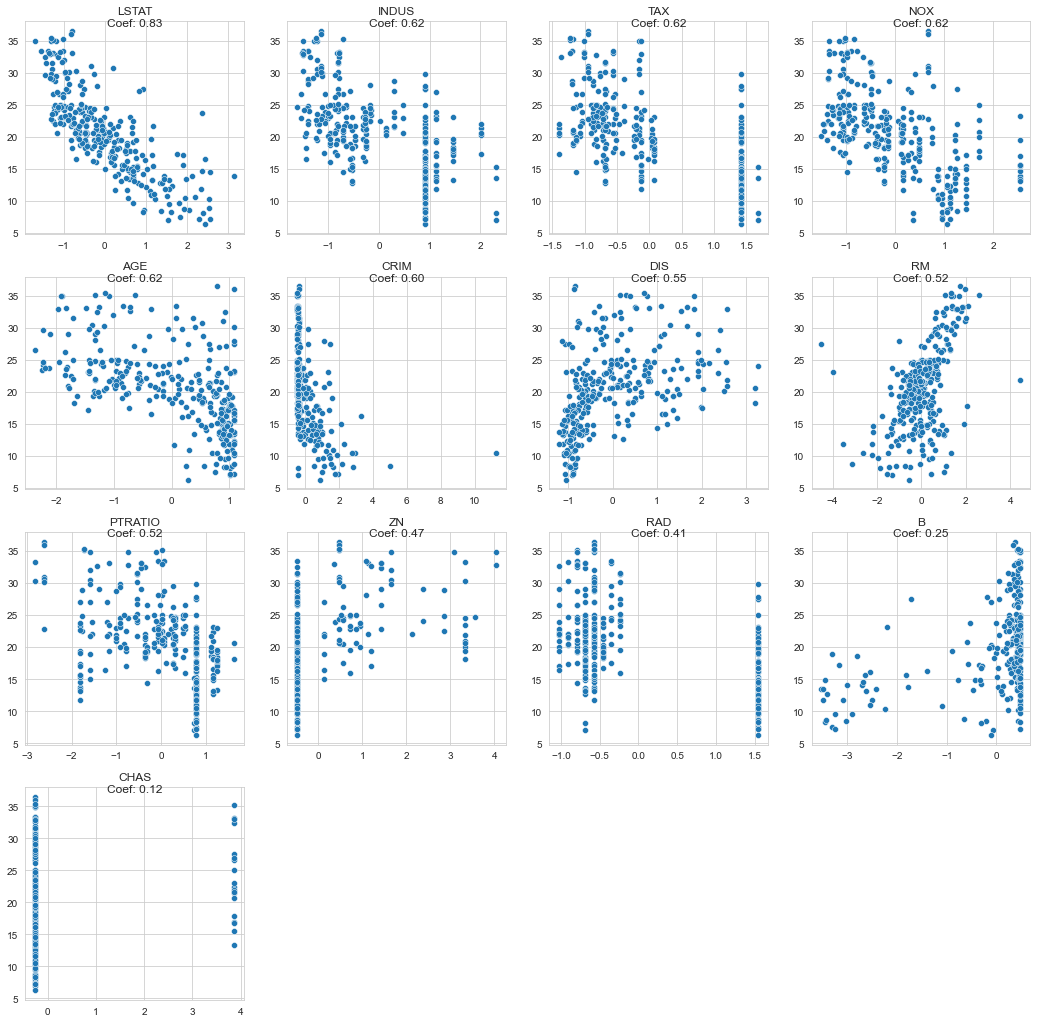

In [156]:
#busquem les correlacions de les variables amb la variable objectiu
#utilitzem la correlació d'spearman doncs funciona millor amb distribucions no normals i és menys sensible als outliers
dataView = X_trainConv.apply(lambda x: spearmanr(x, y_train).correlation)

#seleccionem les 16 variables amb major correlació, en valor absolut
dataView = abs(dataView).sort_values(ascending=False).head(16)
index = dataView.index

#dibuixem els scatters de les variables numèriques més correlacionades amb la variable objectiu
plt.figure(figsize=(18, 18))
for i in range(len(index)):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=X_trainConv[index[i]], y=y_train)
    plt.title(index[i] + "\nCoef: {0:.2f}".format(dataView[index[i]]), y=.95)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

***A la vista d'aquests resultats veiem que tenim atributs amb una forta correlació amb el preu LSTAT,AGE,DIS,RM***

***Defineixo una funció per calcular el MSE***

In [157]:
from sklearn.metrics import r2_score

def calcMSE(yDf,pyDf):
    i=0
    MSE=0
    for ix in yDf.index:
        MSE+=pow((yDf[ix]-pyDf[i]),2)
        i=i+1
    MSE=MSE/len(yDf)
    return (MSE)

* ***Metode 1 regresio lineal -LinearRegression-***


In [158]:
#Importem la llibreria del mètode de regresio lineal
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
regresLr = linear_model.LinearRegression()
regresLr.fit(X_trainConv, y_train)
predictyTestLR=regresLr.predict(X_testConv)
print('Coefficients: \n', regresLr.coef_)

Coefficients: 
 [-0.86215758  0.72402896 -0.18980097  0.12923757 -1.14560503  0.99562629
 -0.57506482 -2.07326053  2.1784272  -2.16911074 -1.3310212   0.85334223
 -3.00328069]


In [160]:
lmError = mean_squared_error(y_test, predictyTestLR)

In [161]:

r2Lr= r2_score(y_test, predictyTestLR)
MSELr=calcMSE(y_test, predictyTestLR)
print("MSE error = {0}".format(MSELr)+" in Linear Regression")
print("R2 error = {0}".format(r2Lr)+" in Linear Regression")

MSE error = 11.544976832676618 in Linear Regression
R2 error = 0.7160307179465037 in Linear Regression


* ***Ridge Regression***

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
regresRg=linear_model.Ridge()
regresRg.fit(X_trainConv,y_train)
predictyTestRg=regresRg.predict(X_testConv)

In [164]:
MSERg=calcMSE(y_test,predictyTestRg)
r2Rg = r2_score(y_test, predictyTestRg)
print("MSE error = {0:.3f}".format(MSERg)+" in Ridge Regression")
print("R2 error = {0:.3f}".format(r2Rg)+"  in Ridge Regression")

MSE error = 11.528 in Ridge Regression
R2 error = 0.716  in Ridge Regression


* ***Metode 2 Random Forest ***

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [166]:
regresRf = RandomForestRegressor(random_state=1)
regresRf.fit(X_trainConv, y_train)

RandomForestRegressor(random_state=1)

In [167]:
predictyTestRf = regresRf.predict(X_testConv)
# evaluate predictions
mae = mean_absolute_error(y_test, predictyTestRf)
print('MAE: %.3f' % mae)

MAE: 2.303


In [168]:
MSErF=calcMSE(y_test,predictyTestRf)
r2Rf = r2_score(y_test, predictyTestRf)
print("MSE error = {0:.3f}".format(MSErF)+" in Random Forest")
print("R2 error = {0:.3f}".format(r2Rf)+" in Random Forest")

MSE error = 9.844 in Random Forest
R2 error = 0.758 in Random Forest


### Exercici 2 Compara’ls en base al MSE i al R2.



***Veim que el Random Forest ens dona un MSE mes baix i una R2 error mes alt , per tant el random Forest semble tenir un comportament millor que el linear i el Ridge***

In [169]:
deltaMSE=MSELr-MSErF
print("MSE Random Forest {0:.2f}|\nMSE Linear regresion {1:.2f} ---> Delta {2:.2f} a favor del Random Forest\n".format(MSErF,MSELr,deltaMSE))
deltaR2=r2Lr-r2Rf
print("R2 Random Forest {0:.2f}|\nR2 Linear regresion {1:.2f} ---> Delta {2:.2f} a favor del Random Forest".format(r2Rf,r2Lr,deltaR2))

MSE Random Forest 9.84|
MSE Linear regresion 11.54 ---> Delta 1.70 a favor del Random Forest

R2 Random Forest 0.76|
R2 Linear regresion 0.72 ---> Delta -0.04 a favor del Random Forest


### Exercici 3 Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

* ***1 Entrenament Ridge***

L'entrenament en base al error del linearregression, farem la intereació per trobar el alpha amb minim error 
fem la corba del comportament de cada iteració



In [170]:
from sklearn.linear_model import  Ridge
import numpy as np 

In [171]:
#Considerem 500 valors de alpha entre 10 elevat a -10 i 10 elevat a 2
#Pere cada possible valor de alpha entrenem la mostra de train i el testegem al la mostra de test
alpha = 10**np.linspace(-10, 2, 500)
errorArray = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  ridgeRg = Ridge(alpha=a)
  ridgeRg.fit(X_trainConv, y_train)
  predictRg = ridgeRg.predict(X_testConv)
  errorArray[idx] = mean_squared_error(y_test, predictRg)

In [172]:
# Optimal alpha
smallest_error = np.min(errorArray)
optimal_alpha = alpha[np.argmin(errorArray)]
alphaOptim=np.round(optimal_alpha, 2)
alphaError=np.round(smallest_error, 2)
print("El valor óptim alpha es: {0}, amb un error de {1}".format(alphaOptim,alphaError))

El valor óptim alpha es: 10.92, amb un error de 11.47


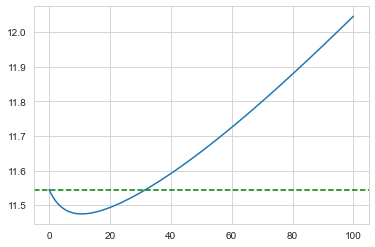

In [173]:
import matplotlib.pyplot as plt
plt.plot(alpha, errorArray)
plt.axhline(y=lmError, color='g', linestyle='--')

*** La millora del entrenamet del model ridge es bastant feble, comparem resultats amb i sense entrenament***


In [174]:
ridgeRg = Ridge(alpha=10.92)
ridgeRg.fit(X_trainConv, y_train)
predictRg = ridgeRg.predict(X_testConv)

In [175]:
MSERgTrain=calcMSE(y_test,predictRg)
r2RgTain = r2_score(y_test, predictRg)
print("MSE error amb els millors paràmetres = {0:.3f}".format(MSERgTrain)+" in Random Forest\n")
print("R2 error  amb els millors paràmetres = {0:.3f}".format(r2RgTain)+" in Random Forest")

MSE error amb els millors paràmetres = 11.475 in Random Forest

R2 error  amb els millors paràmetres = 0.718 in Random Forest


In [176]:
deltaMSE=MSERg-MSERgTrain
print("MSE Ridge-Trained {0:.2f}|\nMSE Ridge Inicial  {1:.2f} ---> Delta {2:.2f} a favor del Ridge Trained\n".format(MSERgTrain,MSERg,deltaMSE))
deltaR2=r2Rg-r2RgTain
print("R2  Ridge-Trained {0:.2f}|\nMSE Ridge Inicial  {1:.2f} ---> Delta {2:.2f} a favor del Ridge Trained".format(r2RgTain,r2Rg,deltaR2))

MSE Ridge-Trained 11.47|
MSE Ridge Inicial  11.53 ---> Delta 0.05 a favor del Ridge Trained

R2  Ridge-Trained 0.72|
MSE Ridge Inicial  0.72 ---> Delta -0.00 a favor del Ridge Trained


* ***2 Entrenament RandomForest creant una graella per trobar el millor paràmentres per el random forest***

In [184]:
n_estimators = [5,20,50,100,125,150,175,200] # nombre d'arbres al random forest
max_features = ['auto', 'sqrt'] # maxim nombre de caràcteristicas en cada divisió
max_depth = [int(x) for x in np.linspace(5, 120, num = 12)] # maxim nombre de nivells permesos a cada arbre de decissio
min_samples_split = [2, 6, 10] # minim nombre de mostres a divisió de un node
min_samples_leaf = [1, 3, 4] # minim nombre de mostres que es podem enmagatzenar en un node-fulla
bootstrap = [True, False] # method used to sample data points



In [185]:
random_grid = {'n_estimators': n_estimators,\
'max_features': max_features,\
'max_depth': max_depth,\
'min_samples_split': min_samples_split,\
'min_samples_leaf': min_samples_leaf,\
'bootstrap': bootstrap}

In [186]:
modelRf = RandomForestRegressor(random_state=42) 

In [187]:
random_grid

{'n_estimators': [5, 20, 50, 100, 125, 150, 175, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 15, 25, 36, 46, 57, 67, 78, 88, 99, 109, 120],
 'min_samples_split': [2, 6, 10],
 'min_samples_leaf': [1, 3, 4],
 'bootstrap': [True, False]}

In [188]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = modelRf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [189]:
rf_random.fit(X_trainConv, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 15, 25, 36, 46, 57, 67,
                                                      78, 88, 99, 109, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100, 125,
                                                         150, 175, 200]},
                   random_state=35, verbose=2)

***Observem el millors paràmetres despres de les iteracions***

In [190]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 125, 150, 175, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 15, 25, 36, 46, 57, 67, 78, 88, 99, 109, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 88, 'bootstrap': False}  



***Apliquem els millors paràmetresx el random forest i veiem resultats***

In [191]:
regresRfTrained = RandomForestRegressor(n_estimators = 20, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 88, bootstrap=False) 
regresRfTrained.fit( X_trainConv, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=88, max_features='sqrt',
                      min_samples_split=6, n_estimators=20)

***Visualitzem una comparativa entre la millor predicció i la inicial***

In [192]:
y_pred_rfImp=regresRfTrained.predict(( X_testConv ) )
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": y_pred_rfImp } ) 
y_pred_rf1

,actual,predicted_prob
90,22.6,24.545417
89,28.7,29.545833
165,25.0,21.472083
173,23.6,22.460500
57,31.6,27.388417
...,...,...
310,16.1,21.750583
347,23.1,26.862083
167,23.8,19.309167
240,22.0,26.479917


In [193]:
MSErFImpr=calcMSE(y_test,y_pred_rfImp)
r2RfImpr = r2_score(y_test, y_pred_rfImp)
print("MSE error amb els millors paràmetres = {0:.3f}".format(MSErFImpr)+" in Random Forest\n")
print("R2 error  amb els millors paràmetres = {0:.3f}".format(r2RfImpr)+" in Random Forest")

MSE error amb els millors paràmetres = 9.040 in Random Forest

R2 error  amb els millors paràmetres = 0.778 in Random Forest


***Comparem els resultats del randomforest sense entrenar i amb el millors parametres***

In [194]:
deltaR2Imp=r2Rf-r2RfImpr
deltaMSEImpr=MSErF-MSErFImpr
print("MSE Random Forest {0:.2f}|\nMSE Random Forest Trained {1:.2f} ---> Delta {2:.2f} a favor del Random Forest Trained\n".format(MSErF,MSErFImpr,deltaMSEImpr))
print("R2 Random Forest {0:.2f}|\nR2 Random Forest Trained regresion {1:.2f} ---> Delta {2:.2f} a favor del Random Forest Trained".format(r2Rf,r2RfImpr,deltaR2Imp))

MSE Random Forest 9.84|
MSE Random Forest Trained 9.04 ---> Delta 0.80 a favor del Random Forest Trained

R2 Random Forest 0.76|
R2 Random Forest Trained regresion 0.78 ---> Delta -0.02 a favor del Random Forest Trained


### Exercici 4 - Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

***Fem una cross validation fent servir un kernel lineal***

In [195]:
from sklearn import svm
from sklearn.model_selection import cross_val_score


In [196]:
X_train, X_test, y_train, y_test = train_test_split(\
    X_Total, y , test_size=0.35, random_state=45)

regression = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)
regression.score(X_test, y_test)   


0.7481737907178891

***Tenim un resuktat al train/test del 65.9% de accuracy***

* ***Fem un cross validation fent servir un kernel 'linear'***

In [197]:
from sklearn.model_selection import cross_val_score
regression = svm.SVR(kernel='linear', C=1)
scores = cross_val_score(regression, X_Total, y, cv=5)
scores             

array([0.67829125, 0.70361402, 0.43453316, 0.10067332, 0.45216915])

In [198]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.47 (+/- 0.43)


In [199]:
from sklearn import metrics
scores = cross_val_score(
    regression, X_Total, y, cv=5, scoring='neg_mean_squared_error')
scores 

array([ -8.76113565, -10.7292082 , -13.48561058, -32.85199089,
       -13.35556118])

*** No se si te sentit el que faré ara***,
* ***aplico el model entrenat de random forest a tot el dataset***
* ***comparo la predicció amb la realitat del tot el datset***
* ***genero una columna que indica el % de desviació***
* ***calculo el R2 i MSE a aquesta predicicó del tot el dataset***

In [200]:
y_predTotal=regresRfTrained.predict(X_Total)
y_predInternal= pd.DataFrame( { "ActualAllData": y, 
"PreditAllData": y_predTotal } ) 
y_predInternal["DEVPCT"]=round(((y_predInternal["ActualAllData"]-y_predInternal["PreditAllData"])/y_predInternal["ActualAllData"])*100,1)


In [125]:
y_predInternal

,ActualAllData,PreditAllData,DEVPCT
0,24.0,26.432000,-10.1
1,21.6,22.704000,-5.1
2,34.7,29.708722,14.4
3,33.4,32.039333,4.1
4,36.2,31.340911,13.4
...,...,...,...
501,22.4,22.597089,-0.9
502,20.6,20.883822,-1.4
503,23.9,24.962044,-4.4
504,22.0,24.088367,-9.5


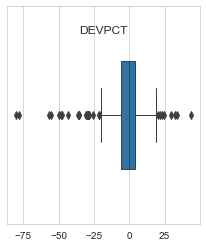

In [126]:
mostraBoxPlot(y_predInternal,["DEVPCT"])

In [201]:
MSErFTot=calcMSE(y,y_predTotal)
r2RfTot = r2_score(y, y_predTotal)
print("MSE error amb els millors paràmetres = {0:.3f}".format(MSErFTot)+" in Random Forest\n")
print("R2 error  amb els millors paràmetres = {0:.3f}".format(r2RfTot)+" in Random Forest")

MSE error amb els millors paràmetres = 4.934 in Random Forest

R2 error  amb els millors paràmetres = 0.881 in Random Forest


### Exercici 5 - No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

***Eliminem la columna corresponent a RM de les mostres de train i test***

In [202]:
X_testConvNoRM = X_testConv.drop(columns='RM')
X_trainConvNoRM = X_trainConv.drop(columns='RM')

In [203]:
modelRfNoRM = RandomForestRegressor(random_state=1)
modelRfNoRM.fit(X_trainConvNoRM, y_train)
predictyTestRfNoRm = modelRfNoRM.predict(X_testConvNoRM)
# evaluate predictions
mae = mean_absolute_error(y_test, predictyTestRfNoRm)
print('MAE: %.3f' % mae)

MAE: 5.459


In [204]:
MSErFNoRM=calcMSE(y_test,predictyTestRfNoRm)
r2RfNoRM = r2_score(y_test, predictyTestRfNoRm)
print("MSE error = {0:.3f}".format(MSErFNoRM)+" in Random Forest")
print("R2 error = {0:.3f}".format(r2RfNoRM)+" in Random Forest")

MSE error = 46.153 in Random Forest
R2 error = -0.085 in Random Forest


In [205]:
deltaR2ImpNoRM=r2Rf-r2RfNoRM
deltaMSEImpNoRM=MSErF-MSErFNoRM
print("MSE Random Forest {0:.2f}|\nMSE Random Forest sense RM {1:.2f} ---> Delta {2:.2f} a favor del Random Forest \n".format(MSErF,MSErFNoRM,deltaMSEImpNoRM))
print("R2 Random Forest {0:.2f}|\nR2 Random Forest sense RM {1:.2f} ---> Delta {2:.2f} a favor del Random Forest ".format(r2Rf,r2RfNoRM,deltaR2ImpNoRM))

MSE Random Forest 9.84|
MSE Random Forest sense RM 46.15 ---> Delta -36.31 a favor del Random Forest 

R2 Random Forest 0.76|
R2 Random Forest sense RM -0.09 ---> Delta 0.84 a favor del Random Forest 


* ***CONCLUSIÓ: Al eliminar la columna RM perdem molta precissió ja que com podem veure al grafic que hem fet mes amunt la RM te una correlacio bastant marcada amb el target*** 

In [132]:
X_trainConvNoRM

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,-0.440838,0.108409,-0.557945,-0.262613,-0.343361,0.947373,1.024251,-0.557874,-0.659075,-1.564623,0.448674,0.862404
223,-0.377327,-0.486051,-0.800182,-0.262613,-0.483650,0.404190,-0.232231,-0.219511,-0.682804,-0.530415,0.448674,-0.842632
450,0.447104,-0.486051,0.925935,-0.262613,1.216313,0.823115,-0.677188,1.585089,1.446806,0.785850,-3.577680,0.609971
83,-0.455567,0.702869,-0.994551,-0.262613,-1.152082,-0.806433,0.766330,-0.670661,-0.837037,0.221736,0.385118,-0.855918
264,-0.386058,0.465085,-1.123647,-0.262613,0.671665,0.787613,-0.861786,-0.557874,-0.937882,-2.598832,0.357199,-0.768820
...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.457588,3.556279,-1.592164,-0.262613,-1.284117,-1.196957,2.542828,-0.896236,-0.647211,-0.577425,0.448674,-1.112780
478,0.921969,-0.486051,0.925935,-0.262613,0.399341,0.968674,-0.749010,1.585089,1.446806,0.785850,0.274048,0.697068
128,-0.416403,-0.486051,1.475681,-0.262613,0.481863,1.043229,-0.916954,-0.670661,0.088364,1.255945,0.448674,0.307345
386,2.834892,-0.486051,0.925935,-0.262613,1.109034,1.085831,-1.078940,1.585089,1.446806,0.785850,0.448674,2.210195
